# Data Exploration and Preprocessing

In [59]:
!pip install ppscore

In [60]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

#loading the data set
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [61]:
#find did any null values exists
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [62]:
# finding different datatypes in data set
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [63]:
# finding column names
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [64]:
df1=df.select_dtypes(include='number').columns
df1

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [65]:
for column in df.select_dtypes(include='number').columns:
    print(f'statistics of {column} is:')

    mean = st.mean(df[column])
    print(f'  mean:{mean}')

    Median= st.median(df[column])
    print(f'  Median:{Median}')

    Mode= st.mode(df[column])
    print(f'  Mode:{Mode}')

    sd = st.stdev(df[column])
    print(f'  standard deviation:{sd}')

statistics of age is:
  mean:38.58164675532078
  Median:37
  Mode:36
  standard deviation:13.640432553581341
statistics of fnlwgt is:
  mean:189778.36651208502
  Median:178356
  Mode:123011
  standard deviation:105549.97769702224
statistics of education_num is:
  mean:10.0806793403151
  Median:10
  Mode:9
  standard deviation:2.572720332067388
statistics of capital_gain is:
  mean:1077.6488437087312
  Median:0
  Mode:0
  standard deviation:7385.29208484034
statistics of capital_loss is:
  mean:87.303829734959
  Median:0
  Mode:0
  standard deviation:402.96021864899967
statistics of hours_per_week is:
  mean:40.437455852092995
  Median:40
  Mode:40
  standard deviation:12.347428681731843


In [66]:
# Handle missing values
# For categorical columns, impute with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [67]:
# For numerical columns, impute with median
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [68]:
# finding column names
print(df.dtypes)


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [69]:
#remove outlier, NaN
import numpy as np
non_zero=['age','fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for column in non_zero:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)
    print(df[column])

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64
0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64
0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education_num, Length: 32561, dtype: int64
0         2174.0
1        12938.0
2        12938.0
3        12938.0
4        12938.0
          ...   
32556    12938.0
32557    12938.0
32558    12938.0
32559    12938.0
32560    15024.0
Name: capital_gain, Length: 32561, dtype: float64
0        1871.0
1        1871.0
2        1871.0
3        1871.0
4        1871.0
          ...  
32556    1871.0
32557    1871.0
32558    1871.0
32559    1871.0
32560    1871.0
Name: capital_los

In [70]:
#check for columns with mixed types
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"Column {col} has mixed data types.")
    else:
        print(f"Column {col} don't have mixed data types.")

Column age don't have mixed data types.
Column workclass don't have mixed data types.
Column fnlwgt don't have mixed data types.
Column education don't have mixed data types.
Column education_num don't have mixed data types.
Column marital_status don't have mixed data types.
Column occupation don't have mixed data types.
Column relationship don't have mixed data types.
Column race don't have mixed data types.
Column sex don't have mixed data types.
Column capital_gain don't have mixed data types.
Column capital_loss don't have mixed data types.
Column hours_per_week don't have mixed data types.
Column native_country don't have mixed data types.
Column income don't have mixed data types.


In [71]:
# Step 1.2: Scaling Numerical Features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Standard Scaling
scaler_standard = StandardScaler()
data_standard = df.copy()
data_standard[numerical_features] = scaler_standard.fit_transform(data_standard[numerical_features])


In [72]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax = df.copy()
data_minmax[numerical_features] = scaler_minmax.fit_transform(data_minmax[numerical_features])


Standard Scaling: Centers data around mean with unit variance. Preferred when features have Gaussian-like distributions.

Min-Max Scaling: Scales data to a range (e.g., 0-1). Useful for algorithms like neural networks.

# Encoding Techniques

In [73]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [74]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [75]:
# One-Hot Encoding for categorical variables with <5 categories
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() < 5]
df1 = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174.0,1871.0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,12938.0,1871.0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,12938.0,1871.0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,12938.0,1871.0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,12938.0,1871.0,40,Cuba,0,0


In [76]:
# Label Encoding for categorical variables with >=5 categories
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() >= 5]
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    df1[col] = label_encoder.fit_transform(df[col])
df1.head(7)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174.0,1871.0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,12938.0,1871.0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,12938.0,1871.0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,12938.0,1871.0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,12938.0,1871.0,40,5,0,0
5,37,4,284582,12,14,2,4,5,4,12938.0,1871.0,40,39,0,0
6,49,4,160187,6,5,3,8,1,2,12938.0,1871.0,16,23,0,0


In [77]:
'''One-Hot Encoding
Pros:

No Ordinal Bias: Treats categories as independent, avoiding false ordinal relationships.

Suitable for Low-Cardinality: Works well for categorical features with few unique values (e.g., gender, marital status).

Algorithm Compatibility: Ideal for algorithms that require numerical inputs (e.g., linear models, neural networks).

Cons:

High Dimensionality: Creates a new binary column for each category, increasing dataset size (curse of dimensionality).

Sparse Data: Results in sparse matrices, which can be inefficient for large datasets.

Not Scalable: Poor performance for high-cardinality features (e.g., zip codes, IDs).

Label Encoding
Pros:

Compact Representation: Converts categories into single numeric values, preserving dataset size.

Efficient for High-Cardinality: Suitable for features with many unique values (e.g., country names).

Algorithm Compatibility: Works well for tree-based models (e.g., decision trees, random forests).

Cons:

Ordinal Bias: Introduces false ordinal relationships, which can mislead algorithms (e.g., linear models).

Limited Interpretability: Numeric labels may not reflect actual category relationships.

Not Suitable for All Models: Incompatible with algorithms that assume ordinality (e.g., linear regression).'''

'One-Hot Encoding\nPros:\n\nNo Ordinal Bias: Treats categories as independent, avoiding false ordinal relationships.\n\nSuitable for Low-Cardinality: Works well for categorical features with few unique values (e.g., gender, marital status).\n\nAlgorithm Compatibility: Ideal for algorithms that require numerical inputs (e.g., linear models, neural networks).\n\nCons:\n\nHigh Dimensionality: Creates a new binary column for each category, increasing dataset size (curse of dimensionality).\n\nSparse Data: Results in sparse matrices, which can be inefficient for large datasets.\n\nNot Scalable: Poor performance for high-cardinality features (e.g., zip codes, IDs).\n\nLabel Encoding\nPros:\n\nCompact Representation: Converts categories into single numeric values, preserving dataset size.\n\nEfficient for High-Cardinality: Suitable for features with many unique values (e.g., country names).\n\nAlgorithm Compatibility: Works well for tree-based models (e.g., decision trees, random forests).\n\

In [78]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,1871.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12938.0,1871.0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12938.0,1871.0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12938.0,1871.0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12938.0,1871.0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,12938.0,1871.0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12938.0,1871.0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,12938.0,1871.0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,12938.0,1871.0,20,United-States,<=50K


# Feature Engineering

In [79]:
# Create new feature: net_capital (capital_gain - capital_loss)
df1['net_capital'] = df1['capital_gain'] - df1['capital_loss']

# Create new feature: age_education_ratio
df1['age_education_ratio'] = df1['age'] / df1['education_num']

df1.head(10)



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,net_capital,age_education_ratio
0,39,7,77516,9,13,4,1,1,4,2174.0,1871.0,40,39,1,0,303.0,3.000000
1,50,6,83311,9,13,2,4,0,4,12938.0,1871.0,13,39,1,0,11067.0,3.846154
2,38,4,215646,11,9,0,6,1,4,12938.0,1871.0,40,39,1,0,11067.0,4.222222
3,53,4,234721,1,7,2,6,0,2,12938.0,1871.0,40,39,1,0,11067.0,7.571429
4,28,4,338409,9,13,2,10,5,2,12938.0,1871.0,40,5,0,0,11067.0,2.153846
5,37,4,284582,12,14,2,4,5,4,12938.0,1871.0,40,39,0,0,11067.0,2.642857
6,49,4,160187,6,5,3,8,1,2,12938.0,1871.0,16,23,0,0,11067.0,9.800000
7,52,6,209642,11,9,2,4,0,4,12938.0,1871.0,45,39,1,1,11067.0,5.777778
8,31,4,45781,12,14,4,10,1,4,14084.0,1871.0,50,39,0,1,12213.0,2.214286
9,42,4,159449,9,13,2,4,0,4,5178.0,1871.0,40,39,1,1,3307.0,3.230769


In [80]:
# Log transformation for skewed 'capital_gain'
# Using log1p to handle zero values
df1['log_capital_gain'] = np.log1p(df1['capital_gain'])

df1.head(8)
'''Log Transformation is Applied to capital_gain to reduce skewness, improving model performance for linear algorithms.'''

'Log Transformation is Applied to capital_gain to reduce skewness, improving model performance for linear algorithms.'

# Feature Selection

In [81]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df1.select_dtypes(include=['int64', 'float64']))
df1 = df1[outliers == 1]  # Remove outliers
'''Outliers can significantly impact model performance in various ways:

Distorting Predictions – Outliers can skew the model’s learned patterns, leading to inaccurate predictions, especially in linear models and distance-based algorithms.
Increasing Error – Metrics like Mean Squared Error (MSE) are sensitive to outliers, causing higher error values and misleading model evaluation.
Affecting Model Complexity – Some models, like decision trees, may create unnecessary splits to accommodate outliers, leading to overfitting.
Biasing Parameter Estimates – In regression models, outliers can pull coefficients toward extreme values, reducing generalizability.
Impacting Training Stability – In neural networks, large outliers can cause unstable gradient updates, slowing down or preventing convergence.
Proper handling, such as outlier removal, transformation, or robust models, can mitigate these effects.'''

'Outliers can significantly impact model performance in various ways:\n\nDistorting Predictions – Outliers can skew the model’s learned patterns, leading to inaccurate predictions, especially in linear models and distance-based algorithms.\nIncreasing Error – Metrics like Mean Squared Error (MSE) are sensitive to outliers, causing higher error values and misleading model evaluation.\nAffecting Model Complexity – Some models, like decision trees, may create unnecessary splits to accommodate outliers, leading to overfitting.\nBiasing Parameter Estimates – In regression models, outliers can pull coefficients toward extreme values, reducing generalizability.\nImpacting Training Stability – In neural networks, large outliers can cause unstable gradient updates, slowing down or preventing convergence.\nProper handling, such as outlier removal, transformation, or robust models, can mitigate these effects.'

In [82]:
# PPS Analysis and Correlation Matrix
# Compute PPS matrix
import ppscore as pps

pps_matrix = pps.matrix(df1)
pps_matrix = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')


In [83]:
# Compute Correlation Matrix
corr_matrix = df1.corr()


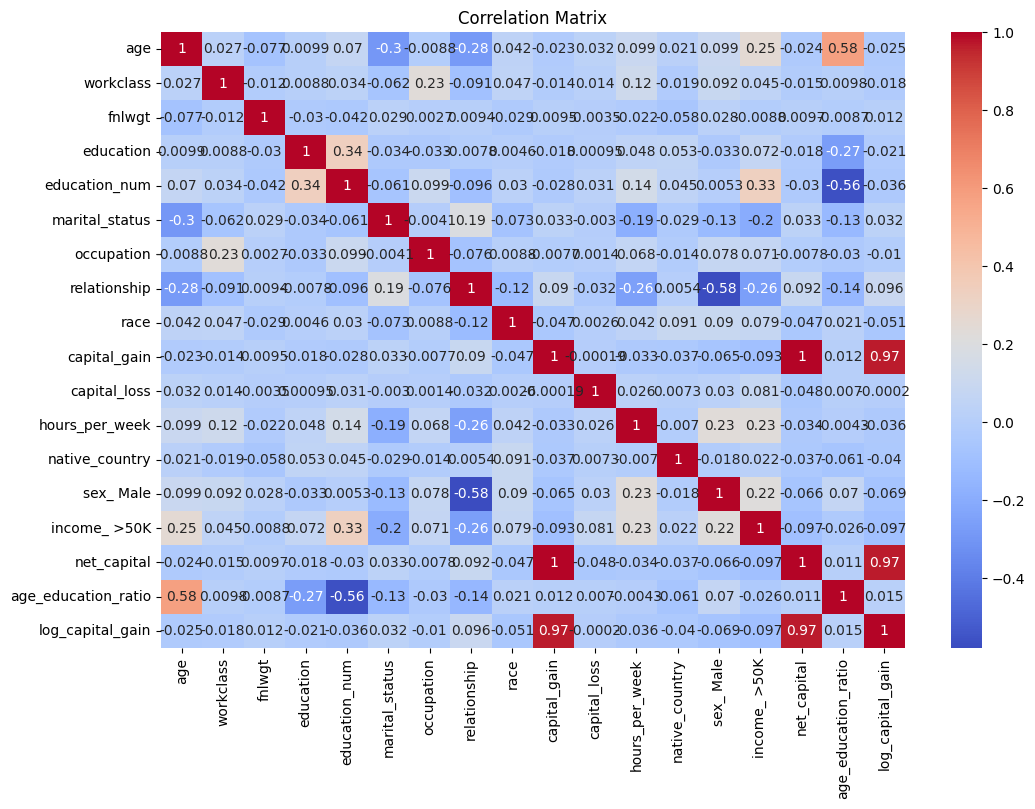

In [84]:
# Optional: Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



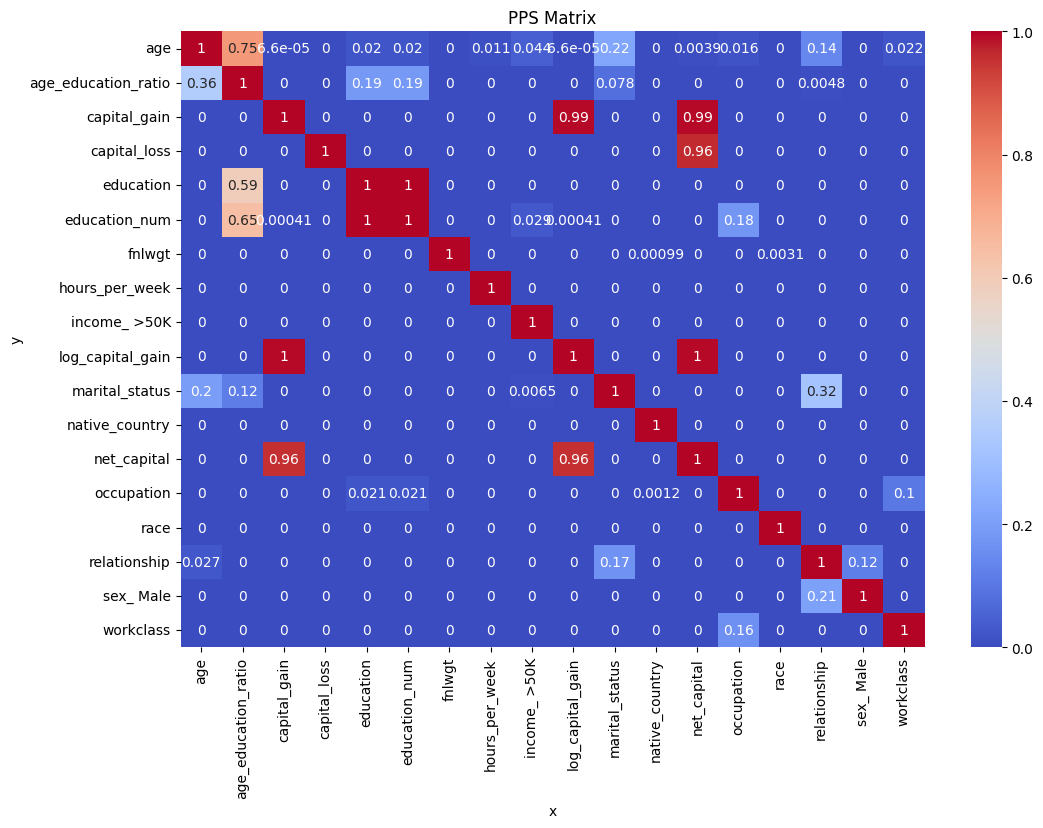

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm')
plt.title('PPS Matrix')
plt.show()